In [45]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
import factor_analyzer as fan

from sklearn.decomposition import FactorAnalysis as FA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [13]:
os.getcwd()
plt.rcParams['figure.figsize'] = [10, 5]

In [14]:
data_satisfaction = pd.read_csv("../Data/satisfaction.csv")
data_satisfaction

,AtWork1,AtWork2,AtWork3,Hobby1,Hobby2,AtHome1,AtHome2,AtHome3,General1,General2
0,105.126,101.659,115.060,100.998,95.184,100.281,101.667,85.553,104.035,110.278
1,77.049,72.933,77.485,72.744,61.563,93.854,95.392,88.609,70.115,72.000
2,86.017,82.206,78.889,77.951,91.705,86.773,108.070,93.348,86.021,70.688
3,91.425,106.107,95.640,90.901,111.466,100.248,86.080,93.822,101.224,82.665
4,113.714,92.029,99.079,79.277,98.416,104.013,83.271,69.621,82.820,70.022
...,...,...,...,...,...,...,...,...,...,...
95,94.618,117.866,103.155,113.343,122.243,118.594,117.448,109.056,115.109,115.603
96,84.764,97.653,91.380,99.431,103.378,116.611,116.933,115.453,106.268,109.385
97,138.876,117.427,112.185,132.825,128.104,99.538,114.693,114.626,138.351,149.032
98,95.370,89.835,107.429,105.645,106.761,92.319,109.707,110.570,108.448,105.657


In [25]:
scaler = StandardScaler()
data_std = pd.DataFrame(scaler.fit_transform(data_satisfaction), columns = data_satisfaction.columns)

<AxesSubplot:>

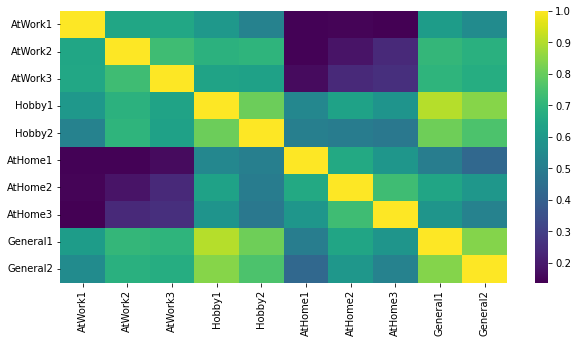

In [26]:
sns.heatmap(data_std.corr(), cmap="viridis")

In [28]:
pca_satisfaction = PCA(3).fit(data_std)

In [37]:
pca_df = pd.DataFrame(pca_satisfaction.fit_transform(data_std), columns = [f"pc_{i+1}" for i in range(3)])
pca_df

,pc_1,pc_2,pc_3
0,0.642869,1.272303,0.336014
1,-4.534313,-1.124683,0.230416
2,-2.822558,-0.921151,-0.235064
3,-0.701307,0.909078,0.581521
4,-2.285649,1.837131,2.452154
...,...,...,...
95,2.978300,-0.871453,0.230524
96,1.060889,-2.262004,-0.049356
97,5.357021,1.176135,-0.309039
98,0.853188,-0.435750,-0.983849


In [76]:
transformer = FA(n_components=2, random_state=0)
data_fa = pd.DataFrame(transformer.fit_transform(data_std), columns = [f"fc_{i+1}" for i in range(2)])
data_fa

,fc_1,fc_2
0,0.265112,0.683961
1,-1.762780,-0.932220
2,-1.016817,-1.056383
3,-0.265599,1.063755
4,-1.077642,1.266070
...,...,...
95,1.169729,-0.401264
96,0.426248,-1.439739
97,2.224841,0.573307
98,0.427926,-0.572642


In [80]:
fa = fan.FactorAnalyzer(n_factors=2,rotation=None)
fa.fit(data_std)


FactorAnalyzer(n_factors=2, rotation=None, rotation_kwargs={})

In [81]:
fa_df = pd.DataFrame(fa.loadings_)
fa_df

,0,1
0,0.618518,-0.430270
1,0.744904,-0.480985
2,0.722218,-0.415638
3,0.942383,0.024757
4,0.853200,-0.051761
5,0.543375,0.501578
6,0.664396,0.617881
7,0.614670,0.505499
8,0.956548,-0.010569
9,0.886109,-0.043153


In [83]:
fa_df = pd.DataFrame(fa.loadings_, columns=[f"fc_{i+1}" for i in range(2)])
fa_df = fa_df.set_index(data_std.columns)
fa_df

,fc_1,fc_2
AtWork1,0.618518,-0.430270
AtWork2,0.744904,-0.480985
AtWork3,0.722218,-0.415638
Hobby1,0.942383,0.024757
Hobby2,0.853200,-0.051761
AtHome1,0.543375,0.501578
AtHome2,0.664396,0.617881
AtHome3,0.614670,0.505499
General1,0.956548,-0.010569
General2,0.886109,-0.043153


<AxesSubplot:xlabel='fc_1', ylabel='fc_2'>

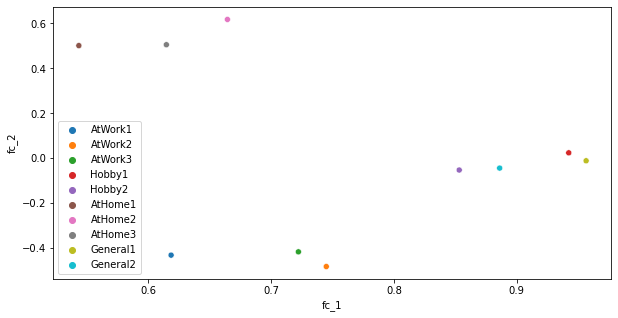

In [85]:
sns.scatterplot(x = fa_df['fc_1'], y=fa_df['fc_2'], hue = fa_df.index.get_level_values(level=0))

In [88]:
rotator = fan.Rotator()
rot_fa_df = pd.DataFrame(rotator.fit_transform(fa_df), columns=[f"rot_fc_{i+1}" for i in range(2)]).set_index(data_std.columns)
rot_fa_df

,rot_fc_1,rot_fc_2
AtWork1,0.752152,0.044318
AtWork2,0.882838,0.082614
AtWork3,0.824601,0.119942
Hobby1,0.725306,0.602187
Hobby2,0.702533,0.486905
AtHome1,0.116882,0.730189
AtHome2,0.140074,0.896425
AtHome3,0.170487,0.777357
General1,0.758283,0.583183
General2,0.723074,0.514019


<AxesSubplot:xlabel='rot_fc_1', ylabel='rot_fc_2'>

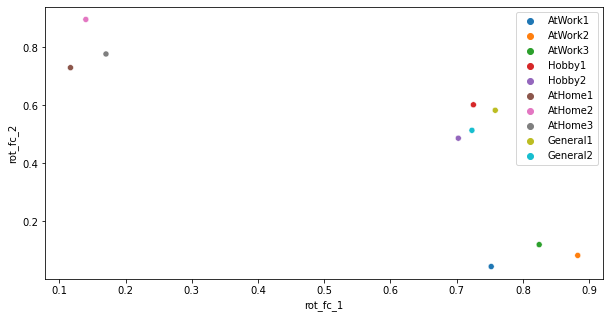

In [90]:
sns.scatterplot(x=rot_fa_df['rot_fc_1'], y=rot_fa_df['rot_fc_2'], hue = fa_df.index.get_level_values(level=0))

In [95]:
rotator.fit_transform(data_std).shape

(100, 10)